In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

'https://drive.google.com/drive/folders/1mHQrOHVtDJxwaRbNdVjFHdz56w21_IcZ?usp=drive_link'

In [7]:
input_dir="C:\\Users\\arnab\\Downloads\\python\\Cats_Dogs"
input_dir

'C:\\Users\\arnab\\Downloads\\python\\Cats_Dogs'

In [8]:
categories=['cats','dogs']
for category in categories:
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path=os.path.join(input_dir,category,file)
        print(img_path)

C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.0.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.1.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.10.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.100.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.101.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.102.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.103.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.104.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.105.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.106.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.107.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.108.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.109.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.11.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.110.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.111.jpg
C:\Users\arnab\Downloads\python\Cats_Dogs\cats\cat.112.jpg
C:\

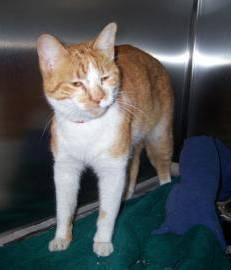

In [9]:
Image.open('C:\\Users\\arnab\\Downloads\\python\\Cats_Dogs\\cats\\cat.115.jpg')

In [11]:
img_p='C:\\Users\\arnab\\Downloads\\python\\Cats_Dogs\\cats\\cat.115.jpg'
img=imread(img_path)
print(img)

[[[137 161 187]
  [130 152 176]
  [131 149 169]
  ...
  [223 235 213]
  [223 235 213]
  [223 235 213]]

 [[125 147 171]
  [119 139 163]
  [123 140 158]
  ...
  [221 233 209]
  [220 232 208]
  [220 232 208]]

 [[113 131 155]
  [111 128 148]
  [116 132 148]
  ...
  [223 236 208]
  [223 236 208]
  [223 236 208]]

 ...

 [[153 148 152]
  [164 158 162]
  [164 153 159]
  ...
  [223 182 188]
  [223 182 188]
  [223 182 188]]

 [[153 148 152]
  [163 157 161]
  [164 153 159]
  ...
  [225 184 190]
  [225 184 190]
  [225 184 190]]

 [[153 148 152]
  [163 157 161]
  [163 152 158]
  ...
  [226 185 191]
  [226 185 191]
  [226 185 191]]]


In [13]:
img=resize(img,(15,15))
img.flatten()

array([0.57150566, 0.5697045 , 0.59762949, 0.69355922, 0.70425635,
       0.6760147 , 0.7274073 , 0.74316296, 0.68453454, 0.63550838,
       0.64226682, 0.59413882, 0.52762733, 0.51846931, 0.49848052,
       0.48419254, 0.46225855, 0.47412898, 0.45714232, 0.43267924,
       0.45143806, 0.52317352, 0.50311748, 0.5221659 , 0.59727609,
       0.58744775, 0.57809449, 0.69178214, 0.69730264, 0.65978792,
       0.76750452, 0.78340953, 0.72499845, 0.77233852, 0.78728788,
       0.72744289, 0.77598811, 0.79214907, 0.73300889, 0.77919238,
       0.79202494, 0.7359423 , 0.77063584, 0.78518105, 0.72901601,
       0.61378367, 0.58526163, 0.58826827, 0.59273656, 0.58828983,
       0.59152255, 0.54363933, 0.53342772, 0.51264778, 0.4398219 ,
       0.41373543, 0.43899198, 0.47503982, 0.43168968, 0.49938868,
       0.54328145, 0.47494809, 0.5444035 , 0.4498075 , 0.40892697,
       0.4789003 , 0.42640553, 0.39564564, 0.46098995, 0.39239651,
       0.36535804, 0.40887841, 0.40707523, 0.39982981, 0.40055

In [14]:
data=[]
labels=[]
for categories_idx,category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path=os.path.join(input_dir,category,file)
        img=imread(img_path)
        img=resize(img,(15,15))
        data.append(img.flatten())
        labels.append(categories_idx)

labels=np.asarray(labels)
data=np.asarray(data)

In [19]:
data.shape

(2000, 675)

In [20]:
labels.shape

(2000,)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
xtrain,xtest,ytrain,ytest=train_test_split(data,labels,
                                           test_size=.25,
                                           shuffle=True,
                                           stratify=labels)
SC=StandardScaler()
xtrain=SC.fit_transform(xtrain)
xtest=SC.fit_transform(xtest)
LR=LogisticRegression()
LR.fit(xtrain,ytrain)
Y_pred=LR.predict(xtest)
Ac_lr=accuracy_score(ytest,Y_pred)
print(f'Accuracy score from Logistic Regression is: {Ac_lr}')

Accuracy score from Logistic Regression is: 0.578


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
y_pred=DT.predict(xtest)
Ac_dt=accuracy_score(ytest,y_pred)
print(f'Accuracy score from Decission Tree Classifier is: {Ac_dt}')

Accuracy score from Decission Tree Classifier is: 0.544


In [26]:
Rf=RandomForestClassifier(n_estimators=980)
Rf.fit(xtrain,ytrain)
y_Pred=Rf.predict(xtest)
Ac_rf=accuracy_score(ytest,y_Pred)
print(f'Accuracy score from random Forest is: {Ac_rf}')

Accuracy score from random Forest is: 0.614


In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(xtrain,ytrain)
y_PRed=KNN.predict(xtest)
Ac_Kn=accuracy_score(ytest,y_PRed)
print(f'Accuracy score from K-Nearest  Algo is: {Ac_Kn}')

Accuracy score from K-Nearest  Algo is: 0.602


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
from sklearn.model_selection import GridSearchCV
RF=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators':[200,500],  
    'max_depth':[4,5,6,7,8],     
    'min_samples_split':[5,10,12],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy']}
grid_search=GridSearchCV(RF,param_grid=param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
y_pRed=grid_search.predict(xtest)
Ac_rfgs=accuracy_score(ytest,y_pRed)
print(f'Accuracy score from random Forest is: {Ac_rfgs}')

Accuracy score from random Forest is: 0.608
